![mnist](https://www.researchgate.net/profile/Hugo-Larochelle/publication/200744481/figure/fig1/AS:668968306098181@1536505881710/Samples-from-the-MNIST-digit-recognition-data-set-Here-a-black-pixel-corresponds-to-an.png)

# Import libraries

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import *

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Data review

In [2]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
submission = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv',index_col=0)

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Visualization

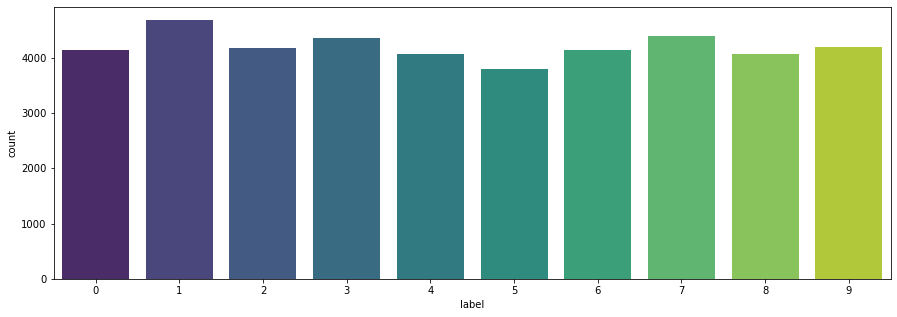

In [4]:
# labels count
plt.figure(figsize=(15,5))
sns.countplot(x='label', palette='viridis', data=train)
plt.show()

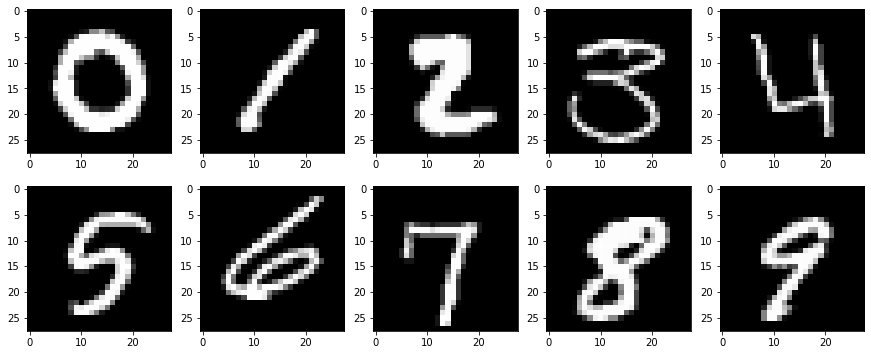

In [5]:
# sample labels
plt.figure(figsize=(15,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(train[train.label==i].drop('label',axis=1).values[0].reshape(28,28), cmap='gray')
plt.show()

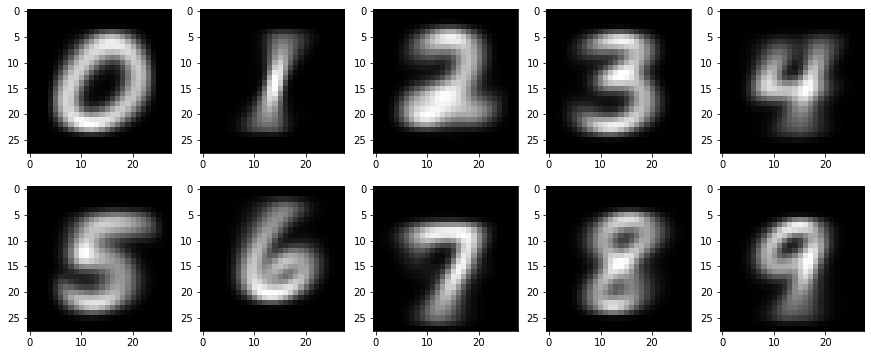

In [6]:
# average view of each labels
plt.figure(figsize=(15,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(train[train.label==i].drop('label',axis=1).values.mean(axis=0).round().reshape(28,28), cmap='gray')
plt.show()

# Processing

In [7]:
# reshape
data = train.drop('label',axis=1).values.reshape(train.shape[0],28,28,1)
labels = train.label

test = test.values.reshape(test.shape[0],28,28,1)

In [8]:
# labels to categorical
X = data.copy()
y = to_categorical(labels,10)

In [9]:
# shapes
print('X:', X.shape)
print('y:', y.shape)
print('test:', test.shape)

X: (42000, 28, 28, 1)
y: (42000, 10)
test: (28000, 28, 28, 1)


# Train model

In [12]:
# Sequential model
model = Sequential([
    Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)),
    BatchNormalization(),
    Conv2D(32,kernel_size=3,activation='relu'),
    BatchNormalization(),
    Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    
    Conv2D(64,kernel_size=3,activation='relu'),
    BatchNormalization(),
    Conv2D(64,kernel_size=3,activation='relu'),
    BatchNormalization(),
    Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    
    Flatten(),
    Dense(128,activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(10,activation='softmax')
])

In [13]:
# compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_7 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_9 (Batch (None, 12, 12, 32)        128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 32)       

In [14]:
# ImageDataGenerator for image augmentation
img_dg = ImageDataGenerator(rotation_range=8, zoom_range = 0.1, width_shift_range=0.1, height_shift_range=0.1)

# learning rate
lr = LearningRateScheduler(lambda x: 1e-3 * 0.96 ** x, verbose=0)

In [15]:
# fitting
history = model.fit(img_dg.flow(X, y, batch_size=128), epochs=40, steps_per_epoch=X.shape[0]//128, callbacks=[lr])

2023-02-04 19:00:02.977913: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/40


2023-02-04 19:00:05.079054: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


328/328 [==============================] - 18s 32ms/step - loss: 0.5201 - accuracy: 0.8358
Epoch 2/40
328/328 [==============================] - 11s 34ms/step - loss: 0.1335 - accuracy: 0.9589
Epoch 3/40
328/328 [==============================] - 11s 32ms/step - loss: 0.0916 - accuracy: 0.9731
Epoch 4/40
328/328 [==============================] - 11s 32ms/step - loss: 0.0784 - accuracy: 0.9766
Epoch 5/40
328/328 [==============================] - 11s 34ms/step - loss: 0.0669 - accuracy: 0.9792
Epoch 6/40
328/328 [==============================] - 10s 31ms/step - loss: 0.0604 - accuracy: 0.9816
Epoch 7/40
328/328 [==============================] - 10s 31ms/step - loss: 0.0540 - accuracy: 0.9840
Epoch 8/40
328/328 [==============================] - 10s 32ms/step - loss: 0.0502 - accuracy: 0.9849
Epoch 9/40
328/328 [==============================] - 11s 34ms/step - loss: 0.0470 - accuracy: 0.9856
Epoch 10/40
328/328 [==============================] - 11s 33ms/step - loss: 0.0433 - accurac

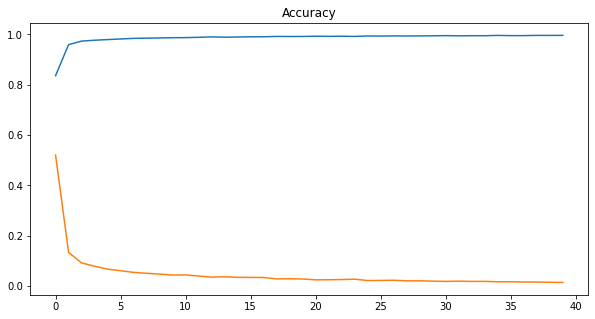

In [16]:
# model accuracy
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.title('Accuracy')
plt.show()

# Prediction

In [17]:
# prediction
result = model.predict(test)
result = np.argmax(result, axis=1)

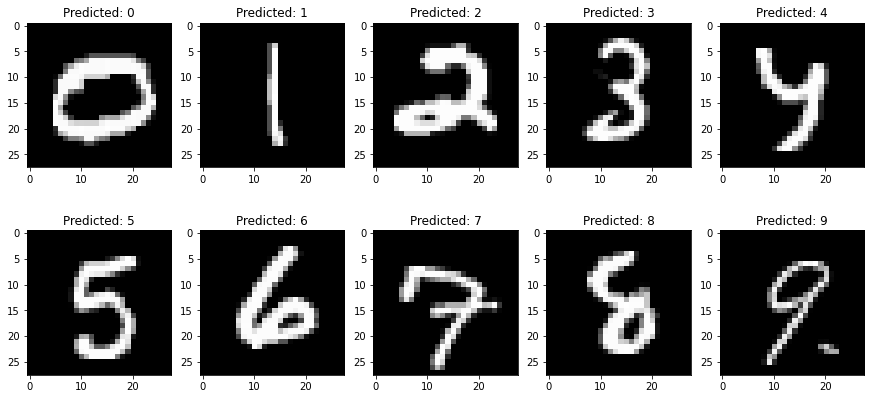

In [18]:
# sample predictions
plt.figure(figsize=(15,7))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(test[result==i][0], cmap='gray')
    plt.title(f"Predicted: {i}")
plt.show()

# Submission

In [19]:
submission.Label = result
submission.to_csv('submission.csv')
pd.read_csv('submission.csv',index_col=0)

,Label
ImageId,
1,2
2,0
3,9
4,0
5,3
...,...
27996,9
27997,7
27998,3
